# Loss Functions

In this exercise, you will compare the effects of Loss functions on a `LinearRegression` model.

👇 Let's download a CSV file to use for this challenge and parse it into a DataFrame

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/loss_functions_dataset.csv")
data.sample(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
390,0.90,563.5,318.5,122.5,7.0,0.25,32.755
84,0.66,759.5,318.5,220.5,3.5,0.10,12.790
518,0.66,759.5,318.5,220.5,3.5,0.25,14.290
737,0.79,637.0,343.0,147.0,7.0,0.40,39.830
575,0.62,808.5,367.5,220.5,3.5,0.40,17.170


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climate needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

> YOUR ANSWER HERE MSE

## 2. Application

### 2.1 Preprocessing

❓ Standardise the features

In [8]:
from sklearn.preprocessing import StandardScaler

X=data.drop(columns=["Average Temperature"])
y = data["Average Temperature"]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### 2.2 Modeling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

# Define the model: SGD with MSE (default 'squared_loss')
model_mse= SGDRegressor(loss="squared_error", random_state=42)

# 10-fold cross-validation on R2 score
r2_scores = cross_val_score(model_mse, X_scaled, y,cv=10, scoring="r2")

# 10-fold cross-validation on R2 score
r2_scores = cross_val_score(model_mse, X_scaled, y, cv=10, scoring="r2")

r2 = r2_scores.mean()
r2

0.8982272875896993

❓ Compute 
- the mean cross-validated R2 score and save it in the variable `r2`
- the single biggest prediction error in °C of all your folds and save it in the variable `max_error_celsius`?

(Tips: `max_error` is an accepted scoring metric in sklearn)

In [15]:
# Compute the max error across all folds (in °C)
max_errors = -cross_val_score(model_mse, X_scaled, y, cv=10, scoring="neg_max_error")
max_error_celsius = max_errors.max()

r2, max_error_celsius


(0.8982272875896993, 9.787281346962047)

### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [18]:
# Model optimized on MAE using epsilon_insensitive loss
model_mae = SGDRegressor(loss="epsilon_insensitive", epsilon=0, random_state=42)

# 10-fold cross-validation on R2 score
r2_mae_scores = cross_val_score(model_mae, X_scaled, y, cv=10, scoring="r2")

r2_mae = r2_mae_scores.mean()
r2_mae


0.8763275370982454

❓ Compute 
- the mean cross-validated R2 score, store it in `r2_mae`
- the single biggest prediction error of all your folds, store it in `max_error_mae`?

In [19]:
# Compute max error across all folds (in °C)
max_errors_mae = -cross_val_score(model_mae, X_scaled, y, cv=10, scoring="neg_max_error")
max_error_mae = max_errors_mae.max()

r2_mae, max_error_mae


(0.8763275370982454, 11.210013223184902)

## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing the risk of killing plants!

    
</details>

> YOUR ANSWER HERE

# 🏁 Check your code and push your notebook

In [20]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error_celsius,
    max_error_mae = max_error_mae
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/04-Under-the-hood/data-loss-functions/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_loss_functions.py::TestLossFunctions::test_max_error_order PASSED   [ 33%]
test_loss_functions.py::TestLossFunctions::test_r2 PASSED                [ 66%]
test_loss_functions.py::TestLossFunctions::test_r2_mae PASSED            [100%]

============================== 3 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/loss_functions.pickle

git commit -m 'Completed loss_functions step'

git push origin master



/var/folders/nc/tdzq32bj1_jcbgqywymx03k80000gn/T/ipykernel_66162/972080489.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([max_errors, max_errors_mae], labels=["MSE", "MAE"])


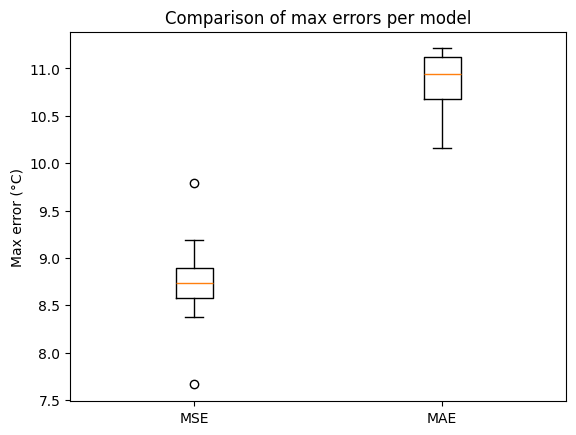

In [21]:
import matplotlib.pyplot as plt

plt.boxplot([max_errors, max_errors_mae], labels=["MSE", "MAE"])
plt.ylabel("Max error (°C)")
plt.title("Comparison of max errors per model")
plt.show()


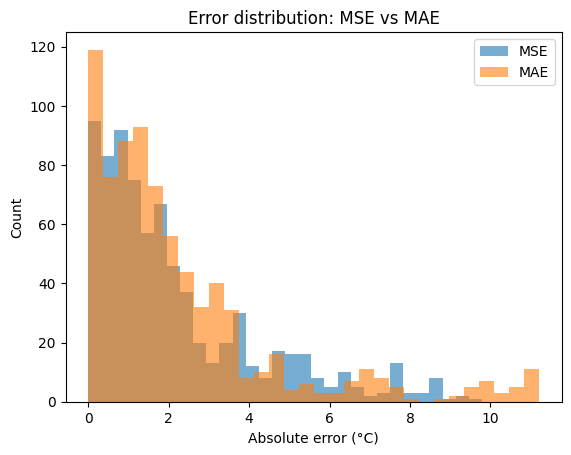

In [22]:
from sklearn.model_selection import cross_val_predict
import numpy as np

y_pred_mse = cross_val_predict(model_mse, X_scaled, y, cv=10)
y_pred_mae = cross_val_predict(model_mae, X_scaled, y, cv=10)

errors_mse = np.abs(y - y_pred_mse)
errors_mae = np.abs(y - y_pred_mae)

plt.hist(errors_mse, bins=30, alpha=0.6, label="MSE")
plt.hist(errors_mae, bins=30, alpha=0.6, label="MAE")
plt.legend()
plt.xlabel("Absolute error (°C)")
plt.ylabel("Count")
plt.title("Error distribution: MSE vs MAE")
plt.show()


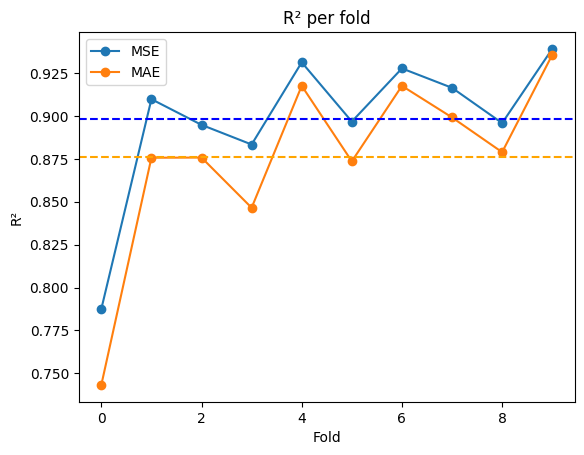

In [23]:
plt.plot(r2_scores, marker="o", label="MSE")
plt.plot(r2_mae_scores, marker="o", label="MAE")
plt.axhline(r2, color="blue", linestyle="--")
plt.axhline(r2_mae, color="orange", linestyle="--")
plt.title("R² per fold")
plt.xlabel("Fold")
plt.ylabel("R²")
plt.legend()
plt.show()
